In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df=pd.read_csv('C:\\Users\\Dell\\Downloads\\datasets\\placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


Finding the boundary vaules

In [9]:
print("Highest allowed",df['cgpa'].mean()+3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


Number of outliers 

In [10]:
df[(df['cgpa']>8.80) | (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


First way

Trimming

In [13]:
# remove extreme values(outliers) from dataset
new_df=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


Second Way

Using z score

In [14]:
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [ ]:
df.head() #only data of those students will be kept whose z score is in the interval of -3 and 3 in accordance of emperical rule of probability as it says that 99.7% of data lies in that interval
df['cgpa_zscore'].unique()

array([ 3.71425214e-01,  8.09809581e-01,  9.39701245e-01, -8.78782054e-01,
        4.36371046e-01,  5.50026252e-01, -4.40397688e-01,  2.57770008e-01,
       -8.30072680e-01,  1.28066686e+00, -2.29323733e-01, -9.43727887e-01,
       -6.18998726e-01, -2.08027995e+00,  1.54045019e+00,  2.25297092e-01,
       -7.00181016e-01,  9.72174161e-01, -5.07226949e-02,  1.08582937e+00,
        7.61100207e-01, -3.26742481e-01, -1.47953100e+00, -8.46309138e-01,
       -1.10609247e+00,  7.93573123e-01, -7.32653932e-01,  1.13453874e+00,
       -1.70684141e+00, -1.18727476e+00,  1.93012518e+00,  8.42282497e-01,
       -1.80614359e-01,  2.51463767e+00,  4.68843962e-01, -5.86525810e-01,
       -4.24161230e-01,  1.44303144e+00,  1.49174082e+00, -6.69591529e-02,
       -1.08985601e+00,  2.06001685e+00, -1.23598413e+00, -1.17103830e+00,
        9.23464787e-01,  2.36850955e+00,  1.88141581e+00,  1.24819395e+00,
        6.14972084e-01,  1.19948457e+00,  1.58915957e+00,  8.90991871e-01,
        1.05335645e+00, -

In [23]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [24]:
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [26]:
new_df=df[(df['cgpa_zscore']<3)& (df['cgpa_zscore']>-3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


Capping

In [27]:
upper_limit=df['cgpa'].mean()+3*df['cgpa'].std()
lower_limit=df['cgpa'].mean()-3*df['cgpa'].std()

In [ ]:
df['cgpa']=np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [ ]:
#All the above methods are used for normally distributed data, for skewed data following techniques are used 

<Axes: ylabel='placement_exam_marks'>

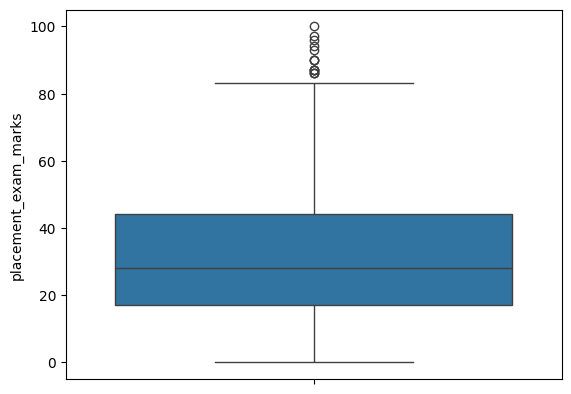

In [30]:
sns.boxplot(df['placement_exam_marks'])

finding the IQR

In [31]:
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [33]:
percentile25

np.float64(17.0)

In [34]:
iqr=percentile75-percentile25
iqr

np.float64(27.0)

In [36]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


Finding OUtliers

In [37]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


Trimming skewed data

In [38]:
new_df=df[df['placement_exam_marks']<upper_limit]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239
